In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Класичне машинне навчання
## Навчання з учителем. Регресія
## Лінійна регресія

## напишіть функцію гіпотези лінійної регресії у векторному вигляді
? для одного, декількох чи багатьох параметрів?

## Лінійна регресія з однією змінною (h)
h(x) = w_0 + w_1 * x  #  залежність від одного параметру


## Лінійна регресія з багатьма змінними (h = linear_regression_hypothesis)
h(x) = w⋅x  # залежність від багатьох параметрів

In [33]:
def linear_regression_hypothesis(w: np.array, x: np.array) -> float:
    """
    Return the value of the linear regression hypothesis of dependence on many parameters.
    w: weights;
    x: parameters, where x[0] = 1.
    """
    if len(w) != len(x) or x[0] != 1:
        return None
    
    return np.dot(w, x)

## створіть функцію для обчислення функції втрат у векторному вигляді (loss_function_many)

In [34]:
def loss_function_many(w: np.array, df: pd.DataFrame, x: pd.DataFrame) -> float:
    """Calculation of the loss function in vector form (for dependence on many parameters).
    w: weights;
    df: DataFrame, where 0-column is y, last each one - important parameters;
    x: DataFrame of parameters where 0 column is 1 (x[0]=1).
    """
    if len(w) != x.shape[1]:
        return None
    
    # n: int = df.shape[1]
    m: int = df.shape[0]
        
    cost = 0
    for line_idx_y, y in enumerate(df.iloc[:, 0]):
        cost += (y - linear_regression_hypothesis(w, x.iloc[line_idx_y])) ** 2

    return cost/(2*m)

## реалізуйте один крок градієнтного спуску

In [35]:
def grad_step_many(weights: list, grads: list, learning_rate: float = 0.001) -> list:
    """Function of one step of gradient descent with many parameters. Return the weights (list)."""
    weights = [weights[num] - learning_rate * grads[num] for num in range(len(weights))]
    
    return weights

## знайдіть найкращі параметри w⃗ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень
? одночасно, чи по окремим показникам?

In [36]:
# prepare data
full_df = pd.read_csv('Housing.csv')
full_df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


df = full_df
df.price = y = df[0]
df.area = x_1 = df[1]
df.bedrooms = x_2 = df[2]
df.bathrooms = x_3 = df[3]
df.stories = x_4 = df[4]
df.parking = x_5 = df[10]

In [37]:
# prepare df:
new_df = full_df.iloc[:, 0:4]
new_df.head(3)

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2


In [38]:
# prepare x
x = pd.DataFrame()
x[0] = np.ones((full_df.shape[0],), dtype=int)
for num in range(1, new_df.shape[1]):
    x[num] = full_df.iloc[:, num]

x.head(3)

,0,1,2,3
0,1,7420,4,2
1,1,8960,4,4
2,1,9960,3,2


In [39]:
def grad_w_i(weights: list, df: pd.DataFrame, x: pd.DataFrame, i: int) -> float:
    """Calculation of the graduation descent weight 1 (for dependence on one parameter).
    weights is list of values from vector weights;
    df: DataFrame;
    x: DataFrame of parameters where 0 column is 1 (x[0]=1);
    i: number of i-parameter in x.
    """
    n: int = df.shape[0]
    cost = 0

    for line_idx_y, y in enumerate(df.iloc[:, 0]):
        cost += (linear_regression_hypothesis(weights, x.iloc[line_idx_y]) - y) * x.iloc[line_idx_y, i]

    return cost/n

In [40]:
def grad_descent(
                 weights: list, 
                 df: pd.DataFrame, 
                 num_iter: int, 
                 learning_rate: float = 0.001, 
                 epsilon: float = 0.0000001
                 ) -> tuple:
    """Gradient descent function with one parameter. Return weights and story of the descent."""
    loss_history = [loss_function_many(weights, df, x)]
    for _ in range(num_iter):
        grads = [grad_w_i(weights, df, x, el) for el in range(x.shape[1])]
        weights = grad_step_many(weights, grads, learning_rate=learning_rate)

        loss = loss_function_many(weights, df, x)
        loss_history.append(loss)

        if abs(loss - loss_history[-2]) < epsilon:
            break

    return (weights, loss_history)

In [41]:
def normalization(data) -> list:
    """Return normalized values (list) of the array_like object (data)."""
    mean: float = np.mean(data)
    value_range = np.max(data) - np.min(data)

    return [(x - mean) / value_range for x in data]

In [42]:
new_df = pd.DataFrame()
new_df['price'] = normalization(full_df.price)
new_df['area'] = normalization(full_df.area)
new_df['bedrooms'] = normalization(full_df.bedrooms)
new_df['bathrooms'] = normalization(full_df.bathrooms)
print(new_df.head(3))

# prepare normalized x
x = pd.DataFrame()
x[0] = np.ones((new_df.shape[0],), dtype=int)
for num in range(1, new_df.shape[1]):
    x[num] = new_df.iloc[:, num]

x.head(3)

      price      area  bedrooms  bathrooms
0  0.738811  0.155977  0.206972   0.237920
1  0.647902  0.261818  0.206972   0.904587
2  0.647902  0.330547  0.006972   0.237920


,0,1,2,3
0,1,0.155977,0.206972,0.237920
1,1,0.261818,0.206972,0.904587
2,1,0.330547,0.006972,0.237920


In [43]:
def x_prepare(w, x):
    """Prepare matrix x, add x[0]=1 to x."""
    return [x if i != 0 else 1.0 for i in range(len(w))]


In [44]:
weights = [0. for _ in range(x.shape[1])]
weights, history = grad_descent(weights, df=new_df, num_iter=1000, learning_rate=0.001)
print(weights, '\n', history)

[1.9014962896804754e-17, 0.01273294983195144, 0.008566092610210577, 0.013747868423366165] 
 [0.013088679029173688, 0.01308823923171806, 0.013087799465531411, 0.013087359730611543, 0.013086920026956177, 0.013086480354563045, 0.013086040713429914, 0.013085601103554511, 0.013085161524934545, 0.01308472197756783, 0.013084282461451968, 0.013083842976584855, 0.013083403522964157, 0.013082964100587567, 0.0130825247094529, 0.013082085349557874, 0.013081646020900237, 0.013081206723477694, 0.013080767457288015, 0.013080328222328914, 0.013079889018598178, 0.013079449846093516, 0.013079010704812627, 0.013078571594753351, 0.013078132515913384, 0.013077693468290406, 0.013077254451882224, 0.013076815466686587, 0.013076376512701196, 0.013075937589923831, 0.013075498698352209, 0.013075059837984087, 0.013074621008817178, 0.013074182210849267, 0.013073743444078079, 0.013073304708501344, 0.013072866004116819, 0.013072427330922247, 0.013071988688915343, 0.013071550078093932, 0.013071111498455674, 0.0130706

In [45]:
weights, history = grad_descent(weights, df=new_df, num_iter=1000, learning_rate=0.1)
print(weights, '\n', history)

[4.5808005706680785e-17, 0.433466285750029, 0.18904866960707878, 0.35366469524133004] 
 [0.012664131279840863, 0.012623240125456792, 0.012582638803963401, 0.01254232522379133, 0.01250229730861748, 0.012462552997253504, 0.01242309024353453, 0.012383907016209384, 0.012345001298830996, 0.012306371089648202, 0.012268014401497667, 0.012229929261697293, 0.012192113711939975, 0.012154565808188208, 0.012117283620569562, 0.012080265233272918, 0.012043508744445366, 0.012007012266089918, 0.011970773923964026, 0.011934791857478774, 0.011899064219598798, 0.011863589176743062, 0.011828364908686159, 0.011793389608460653, 0.011758661482259675, 0.011724178749340715, 0.0116899396419298, 0.011655942405126659, 0.01162218529681004, 0.011588666587544596, 0.011555384560487453, 0.011522337511296363, 0.011489523748037954, 0.01145694159109673, 0.011424589373085164, 0.011392465438753772, 0.011360568144902494, 0.01132889586029223, 0.01129744696555736, 0.011266219853118788, 0.011235212927097497, 0.0112044246032290

In [46]:
weights

[4.5808005706680785e-17,
 0.433466285750029,
 0.18904866960707878,
 0.35366469524133004]

In [47]:
# Розв'язання задачі лінійної регресії за допомогою sklearn
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
X = np.array([new_df.area, new_df.bedrooms, new_df.bathrooms]).T
y = np.array(new_df.price)
reg = LinearRegression().fit(X, y)


In [48]:
# intercept_  =>  Independent term in the linear model  (w_0)
# coef_  =>  Estimated coefficients for the linear regression problem. (w_1, w_2, ... w_i)
# score(X, y[, sample_weight])  =>  Return the coefficient of determination of the prediction.
reg.intercept_, reg.coef_, reg.score(X, y)

(7.014204135081997e-17,
 array([0.47714269, 0.17611257, 0.36001286]),
 0.4870830667058762)

## знайдіть ці ж параметри за допомогою аналітичного рішення
? на око?
## порівняйте отримані результати

<Figure size 600x600 with 0 Axes>

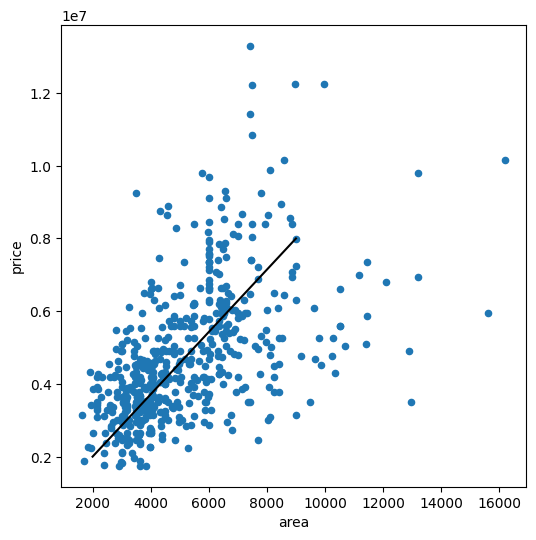

In [49]:
plt.figure(figsize=(6, 6))
full_df.plot(x='area', y='price', kind='scatter', figsize=(6,6))
x_a = [2000, 9000]
y_a = [0.2 * (10 ** 7), 0.8 * (10 ** 7)]
plt.plot(x_a, y_a, color='black')  # на око
plt.show()

In [50]:
def line_normalization(data, line) -> list:
    """Return normalized values (list) of the array_like object (data) by original data."""
    mean: float = np.mean(data)
    value_range = np.max(data) - np.min(data)

    return [(x - mean) / value_range for x in line] 

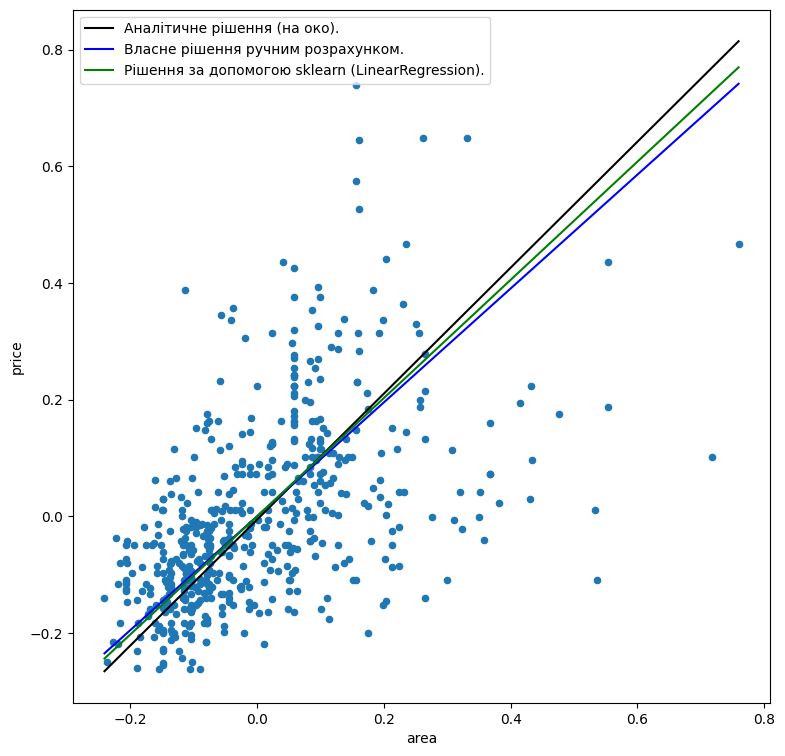

In [51]:
prep_df = pd.DataFrame()
prep_df['price'] = line_normalization(full_df.price, [0.2 * (10 ** 7), 0.8 * (10 ** 7)])
prep_df['area'] = line_normalization(full_df.area, [2000, 9000])

x = np.linspace(np.min(new_df.area), np.max(new_df.area), 3)
y1 = [linear_regression_hypothesis(weights, x_prepare(weights, xi)) for xi in x]
y2 = [linear_regression_hypothesis((reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2]), (1, xi, xi, xi)) for xi in x]
y3 = (prep_df.price[1] - prep_df.price[0]) * (x - prep_df.area[0]) / (prep_df.area[1] - prep_df.area[0]) + prep_df.price[0]

new_df.plot(x='area', y='price', kind='scatter', figsize=(9,9))

plt.plot(x, y3, label='Аналітичне рішення (на око).', color='black')
plt.plot(x, y1, label='Власне рішення ручним розрахунком.', color='blue')
plt.plot(x, y2, label='Рішення за допомогою sklearn (LinearRegression).', color='green')
plt.legend()
plt.show()

In [52]:
loss_result_y1 = history[-1]

x = pd.DataFrame()
x[0] = np.ones((new_df.shape[0],), dtype=int)
for num in range(1, new_df.shape[1]):
    x[num] = new_df.iloc[:, num]

y2_df = new_df.copy(deep=True)
y2_df['price'] = reg.predict(x.iloc[:, 1:])

loss_result_y2 = loss_function_many([reg.intercept_] + list(reg.coef_), y2_df, x)

new_x = new_df.area.copy(deep=True)
y3 = [(prep_df.price[1] - prep_df.price[0]) * (x - prep_df.area[0]) / (prep_df.area[1] - prep_df.area[0]) + prep_df.price[0] for x in new_x]
y3_df = new_df.copy(deep=True)
y3_df['price'] = y3

loss_result_y3 = loss_function_many(weights, y3_df, x)

loss_result_y1, loss_result_y2, loss_result_y3

(0.006735665302554837, 8.692909058117741e-35, 0.005898547870103538)

In [53]:
loss_result_y1 / loss_result_y2

7.748459413899928e+31

In [54]:
loss_result_y3 / loss_result_y2

6.785470583745805e+31

In [55]:
loss_result_y1 / loss_result_y3

1.1419192402750822

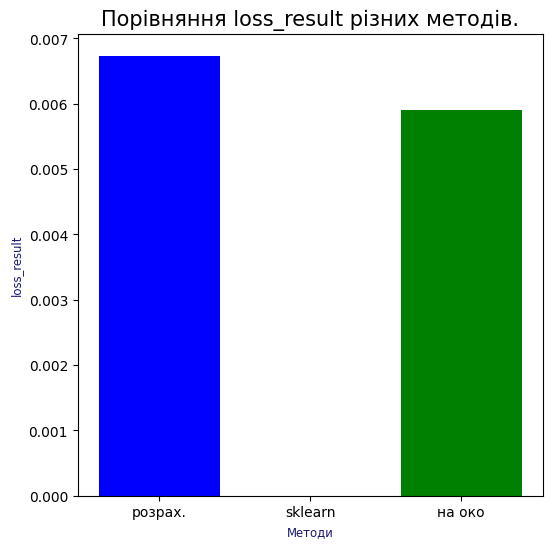

In [56]:
plt.figure(figsize=(6, 6))
plt.bar(['розрах.', 'sklearn', 'на око'], [loss_result_y1, loss_result_y2, loss_result_y3], color=['b', 'y', 'g'])  # на око, але лише враховуючи один параметр
plt.xlabel("Методи", fontsize="small", color="midnightblue")
plt.ylabel("loss_result", fontsize="small", color="midnightblue")
plt.title("Порівняння loss_result різних методів.", fontsize=15)
plt.show()

на око, але лише враховуючи один параметр - не можна коректно оцінити

<Figure size 600x600 with 0 Axes>

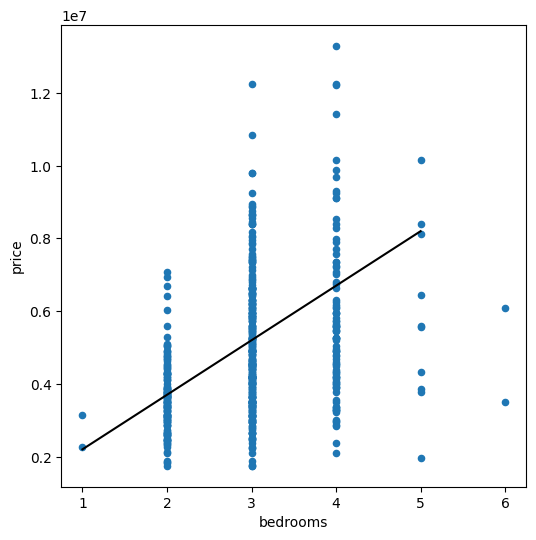

In [57]:
plt.figure(figsize=(6, 6))
full_df.plot(x='bedrooms', y='price', kind='scatter', figsize=(6,6))
x_a = [1, 5]
y_a = [0.22 * (10 ** 7), 0.82 * (10 ** 7)]
plt.plot(x_a, y_a, color='black')  # на око, але лише враховуючи один параметр не можна коректно оцінити
plt.show()

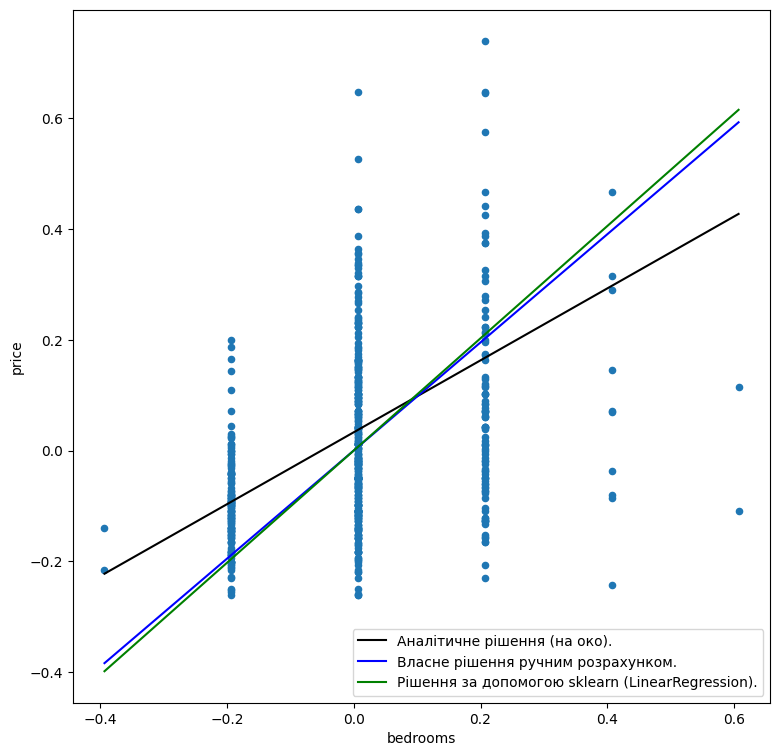

In [58]:
prep_df = pd.DataFrame()
prep_df['price'] = line_normalization(full_df.price, [0.22 * (10 ** 7), 0.82 * (10 ** 7)])
prep_df['bedrooms'] = line_normalization(full_df.bedrooms, [1, 5])

x = np.linspace(np.min(new_df.bedrooms), np.max(new_df.bedrooms), 3)
y1 = [linear_regression_hypothesis(weights, x_prepare(weights, xi)) for xi in x]
y2 = [linear_regression_hypothesis((reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2]), (1, xi, xi, xi)) for xi in x]
y3 = (prep_df.price[1] - prep_df.price[0]) * (x - prep_df.bedrooms[0]) / (prep_df.bedrooms[1] - prep_df.bedrooms[0]) + prep_df.price[0]

new_df.plot(x='bedrooms', y='price', kind='scatter', figsize=(9,9))

plt.plot(x, y3, label='Аналітичне рішення (на око).', color='black')
plt.plot(x, y1, label='Власне рішення ручним розрахунком.', color='blue')
plt.plot(x, y2, label='Рішення за допомогою sklearn (LinearRegression).', color='green')
plt.legend()
plt.show()

на око, але лише враховуючи один параметр - не можна коректно оцінити

<Figure size 600x600 with 0 Axes>

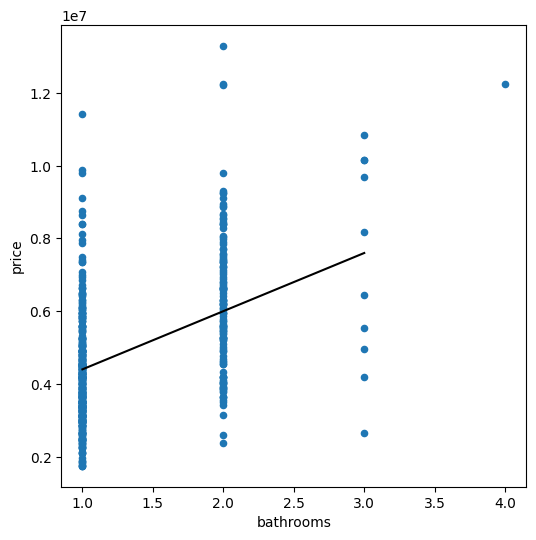

In [59]:
plt.figure(figsize=(6, 6))
full_df.plot(x='bathrooms', y='price', kind='scatter', figsize=(6,6))
x_a = [1, 3]
y_a = [0.44 * (10 ** 7), 0.76 * (10 ** 7)]
plt.plot(x_a, y_a, color='black')  # на око, але лише враховуючи один параметр не можна коректно оцінити
plt.show()

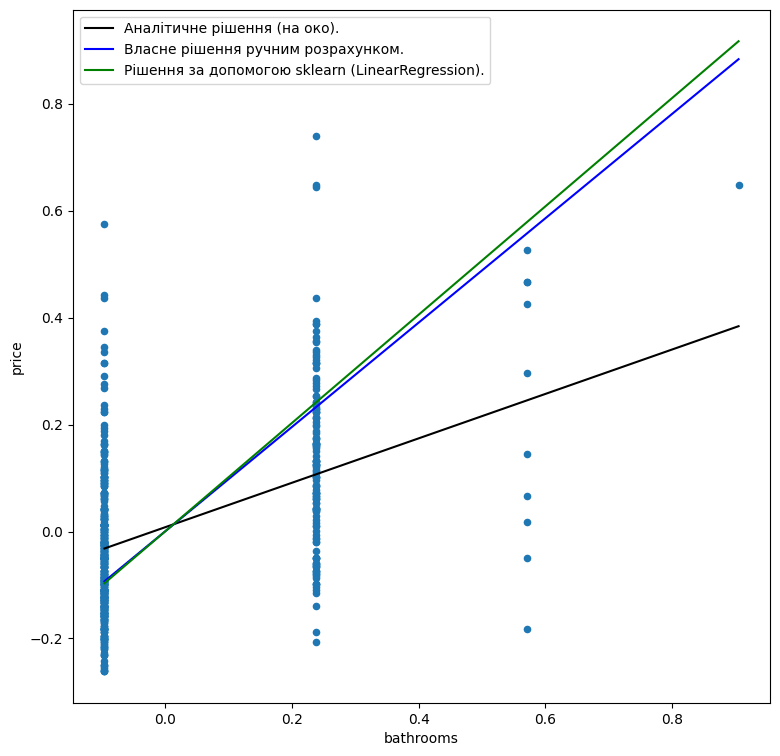

In [60]:
prep_df = pd.DataFrame()
prep_df['price'] = line_normalization(full_df.price, [0.44 * (10 ** 7), 0.76 * (10 ** 7)])
prep_df['bathrooms'] = line_normalization(full_df.bathrooms, [1, 3])

x = np.linspace(np.min(new_df.bathrooms), np.max(new_df.bathrooms), 3)
y1 = [linear_regression_hypothesis(weights, x_prepare(weights, xi)) for xi in x]
y2 = [linear_regression_hypothesis((reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2]), (1, xi, xi, xi)) for xi in x]
y3 = (prep_df.price[1] - prep_df.price[0]) * (x - prep_df.bathrooms[0]) / (prep_df.bathrooms[1] - prep_df.bathrooms[0]) + prep_df.price[0]

new_df.plot(x='bathrooms', y='price', kind='scatter', figsize=(9,9))

plt.plot(x, y3, label='Аналітичне рішення (на око).', color='black')
plt.plot(x, y1, label='Власне рішення ручним розрахунком.', color='blue')
plt.plot(x, y2, label='Рішення за допомогою sklearn (LinearRegression).', color='green')
plt.legend()
plt.show()


In [61]:
# x_a = normalization([2000, 5500, 9000])
# x_a
# def denormalization_w(data, normal_data) -> list: 
#     """Return real values (list) of the array_like object (data)."""   
#     mean: float = np.mean(data)
#     value_range = np.max(data) - np.min(data)
#     return [el * value_range + mean for el in normal_data]

# denormalization_w([2000, 9000], x_a)